![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [154]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


## Inspect the dataset

In [155]:
# Start coding here
# Use as many cells as you need
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


In [156]:
crimes.describe()

,DR_NO,Vict Age
count,2.479880e+05,247988.000000
mean,2.256571e+08,29.954764
std,5.042345e+06,21.901016
min,2.203000e+03,-2.000000
25%,2.210130e+08,0.000000
50%,2.220131e+08,31.000000
75%,2.310058e+08,45.000000
max,2.399165e+08,99.000000


## 1. Which hour has the highest frequency of crimes?

## Convert to datetime and extract the hours

In [157]:
# Add a colon to separate hours and minutes
crimes['TIME OCC'] = crimes['TIME OCC'].str[:2] + ':' + crimes['TIME OCC'].str[2:]

# Convert to datetime
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'])

In [158]:
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC        datetime64[ns]
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [159]:
crimes['TIME OCC'] = crimes['TIME OCC'].dt.strftime('%H:%M')
crimes['Date Rptd'] = crimes['Date Rptd'].dt.strftime('%m/%d/%Y')
crimes['DATE OCC'] = crimes['DATE OCC'].dt.strftime('%m/%d/%Y')

In [160]:
crimes['HOUR'] = crimes['TIME OCC'].apply(lambda x: int(x.split(':')[0]))

In [161]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR
0,221412410,06/15/2022,11/12/2020,17:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,07/22/2022,05/12/2020,11:10,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,08/06/2022,06/04/2020,16:20,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,08/18/2022,08/17/2020,12:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,02/27/2023,01/27/2020,06:35,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6


In [162]:
# Define the list of hours for night time
night_hours = list(range(22, 24)) + list(range(0, 4))

# Create a new DataFrame containing entries for night hours
night_crimes = crimes[crimes['HOUR'].isin(night_hours)]

# Display the DataFrame with entries for night hours
night_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR
9,231207476,02/27/2023,08/15/2020,00:01,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
12,221711184,06/15/2022,05/15/2020,01:55,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
36,221314362,07/11/2022,04/07/2020,00:01,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
39,231307252,03/03/2023,07/05/2020,23:05,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
42,221614254,11/13/2022,01/01/2020,00:01,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247964,231212224,05/17/2023,05/17/2023,23:00,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST,23
247970,231300825,06/07/2023,06/07/2023,22:03,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST,22
247971,230908346,04/19/2023,04/18/2023,22:43,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV,22
247972,230406516,03/19/2023,03/19/2023,01:22,Hollenbeck,VEHICLE - STOLEN,0,NaN,NaN,NaN,Invest Cont,3200 GARNET ST,1


In [163]:
# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes['HOUR'].value_counts().idxmax()

print("Hour with the highest frequency of crimes:", peak_crime_hour)

Hour with the highest frequency of crimes: 12


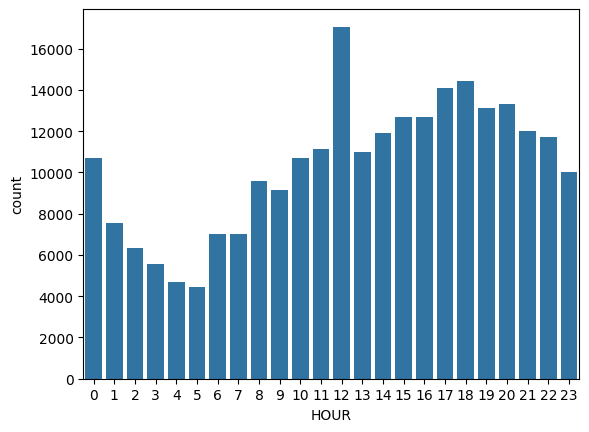

In [164]:
# Plotting
sns.countplot(data=crimes, x="HOUR")
plt.show()

In [165]:
# Midday has the largest volume of crime
peak_crime_hour = 12

## 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

In [166]:
night_crimes_by_area = night_crimes['AREA NAME'].value_counts()
print(night_crimes_by_area)

Central        4091
77th Street    3362
Hollywood      3299
Newton         2927
Southeast      2884
Olympic        2851
Southwest      2787
Pacific        2773
N Hollywood    2597
Rampart        2480
Northeast      2342
Wilshire       2243
Harbor         2128
West Valley    2106
Van Nuys       2029
Mission        1907
Devonshire     1900
Hollenbeck     1892
West LA        1864
Topanga        1743
Foothill       1707
Name: AREA NAME, dtype: int64


In [167]:
peak_night_crime_location = night_crimes_by_area.idxmax()
print("Area with the largest frequency of night crimes is:", peak_night_crime_location)

Area with the largest frequency of night crimes is: Central


<Figure size 1200x600 with 0 Axes>

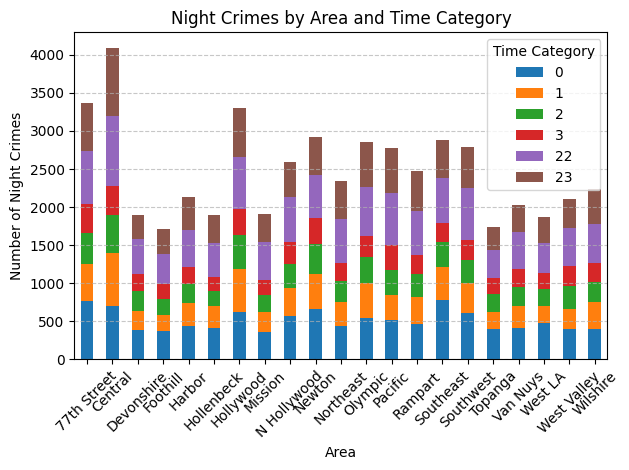

In [168]:
# Plotting
plt.figure(figsize=(12, 6))
night_crimes[['AREA NAME', 'HOUR']].groupby(['AREA NAME', 'HOUR']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Night Crimes by Area and Time Category')
plt.xlabel('Area')
plt.ylabel('Number of Night Crimes')
plt.xticks(rotation=45)
plt.legend(title='Time Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [169]:
# Define age group bins
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

In [170]:
# Categorize victim ages into age groups
crimes['AGE GROUP'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels)

# Count occurrences in each age group
victim_ages = crimes['AGE GROUP'].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: AGE GROUP, dtype: int64


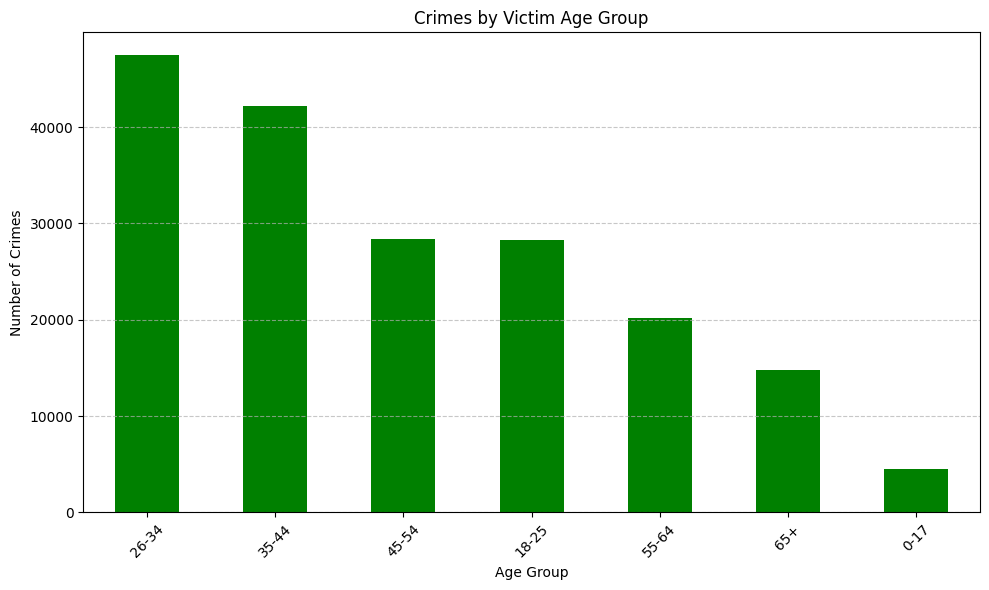

In [171]:
# Plotting
plt.figure(figsize=(10, 6))
victim_ages.plot(kind='bar', color='green')
plt.title('Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()